# Importing Dataset, Cleaning, Writing to another CSV and Getting an Overview

### Data Acquisition

In [862]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#to set pr remove display restrictions for row and column view
pd.set_option("display.max_rows",50)
pd.set_option("display.max_columns",None)

In [432]:
import requests

def download(url, file_name):
    response = requests.get(url)
    if response.status_code == 200:
        with open(file_name, 'wb') as f:
            f.write(response.content)

In [434]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv'
file_name = "auto.csv"
download(url, file_name)

### Read Data

In [437]:
df = pd.read_csv(file_name, header = None)
#to hint that there are no headers in given csv file

In [26]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [439]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

### Add Headers

In [442]:
#indexing the columns
df.columns = headers
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [444]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [446]:
df1=df.replace('?',np.NaN)
#replacing non recognized elements to not a number NaN

In [448]:
df1.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


In [450]:
df=df1.dropna(subset=["price"], axis=0)
# Here, `axis=0` means that the contents along the entire row will be dropped wherever the entity 'price' is found to be NaN


In [452]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


### Save the data set to CSV

In [455]:
df.to_csv("/Users/vythreynarayanam/Downloads/usedCars_eda/eda_with_python_usedCars/usedCars.csv", index=False)
#save the data frame df as usedCars.csv to your local machine

### Basic Insights from the Data set

In [458]:
df = pd.read_csv("/Users/vythreynarayanam/Downloads/usedCars_eda/eda_with_python_usedCars/usedCars.csv")

In [460]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [462]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,164.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,122.000000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,35.442168,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [464]:
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,164.000000,201,201,201,199,201,201,201,201.000000,201.000000,201.000000,201.000000,201.000000,201,201,201.000000,201,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,6,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,181,165,113,94,118,198,NaN,NaN,NaN,NaN,NaN,145,157,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.840796,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,174.200995,65.889055,53.766667,2555.666667,NaN,NaN,126.875622,NaN,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,12.322175,2.101471,2.447822,517.296727,NaN,NaN,41.546834,NaN,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.800000,64.100000,52.000000,2169.000000,NaN,NaN,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.500000,66.600000,55.500000,2926.000000,NaN,NaN,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [468]:
df.shape

(201, 26)

In [470]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

### Handling missing data

Substituting Null Data present in column "normalized-losses" with mean

In [474]:
avg_normalized_losses=df["normalized-losses"].mean()
avg_normalized_losses

122.0

In [476]:
df["normalized-losses"].replace(np.NaN,avg_normalized_losses,inplace = True)

In [478]:
df["normalized-losses"].isnull().sum()

0

Substituting Null Data present in column "num-of-doors" with most frequent values

df["num-of-doors"].value_counts().max()

In [482]:
df["num-of-doors"].replace(np.NAN,df["num-of-doors"].mode()[0],inplace = True)

In [484]:
df["num-of-doors"].isnull().sum()

0

Substituting Null Data present in column "bore" with average

In [487]:
avg_bore=df["bore"].mean()
avg_bore

3.330710659898477

In [489]:
df["bore"].replace(np.NaN,avg_bore,inplace = True)

In [491]:
df["bore"].isnull().sum()

0

Dropping the rows where price is null because we are constructing this is for the main purpose of price prediction. Rows where the prices are null are not required for this data

Substituting Null Data present in column "horsepower" with average

In [495]:
avg_horsepower=df["horsepower"].mean()
avg_horsepower
df["horsepower"].replace(np.NaN,avg_horsepower,inplace = True)
df["horsepower"].isnull().sum()

0

Substituting Null Data present in column "peak-rpm" with average

In [498]:
avg_peak_rpm =df["peak-rpm"].mean()
avg_peak_rpm 
df["peak-rpm"].replace(np.NaN,avg_peak_rpm,inplace = True)
df["peak-rpm"].isnull().sum()

0

Substituting Null Data present in column "stroke" with average

In [501]:
avg_stroke =df["stroke"].mean()
avg_stroke
df["stroke"].replace(np.NaN,avg_stroke,inplace = True)
df["stroke"].isnull().sum()

0

In [503]:
df.dropna(subset=['price'],axis =0, inplace = True)
df["price"].isnull().sum()
# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

Confirm if all the null data is handled correct way

In [506]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [508]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


### Correct data format if any doesn't reflect its actual attribute

In [511]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

All dtypes are accurate for all fields

### Data Normalization

normalize those variables so their value ranges from 0 to 1

In [516]:
df["length"]= df["length"]/df["length"].max()

In [518]:
df["width"]= df["width"]/df["width"].max()

In [520]:
df["height"]= df["height"]/df["height"].max()

In [522]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


### Binning

In [525]:
horsepower_bins = np.linspace(df["horsepower"].min(),df["horsepower"].max(),4)
horsepower_bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [527]:
horsepower_bins_labels = ["low","medium","high"]

In [529]:
df["horsepower_bins"]=pd.cut(df["horsepower"],horsepower_bins,labels = horsepower_bins_labels)

In [531]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower_bins
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,low
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,medium
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,low


plotting horsepower_bins

<Axes: title={'center': 'count of different types of horsepower'}, xlabel='horsepower_bins'>

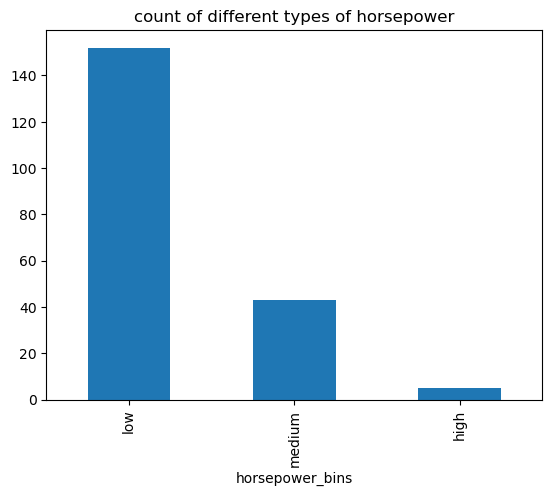

In [534]:
df["horsepower_bins"].value_counts().plot(kind='bar',title="count of different types of horsepower")

### One - Hot Encoding (Creating Dummy variable to help with statistical models)

In [537]:
df.dtypes

symboling               int64
normalized-losses     float64
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                   int64
horsepower_bins      category
dtype: object

In [539]:
columns_needed_to_create_dummies = df.select_dtypes(exclude=['float64','int64']).columns 

In [541]:
columns_needed_to_create_dummies

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system', 'horsepower_bins'],
      dtype='object')

In [543]:
cat_vars=columns_needed_to_create_dummies
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    existing_dummy_columns = [col for col in df.columns if col.startswith(var + '_')]
    if existing_dummy_columns:
        df = df.drop(columns=existing_dummy_columns)
    df_with_dummies = df.join(cat_list)
    df = df_with_dummies
cat_vars=columns_needed_to_create_dummies
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [545]:
df_final=df[to_keep]
df_final.columns.values

array(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make_alfa-romero', 'make_audi',
       'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda',
       'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_renault', 'make_saab',
       'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo',
       'fuel-type_diesel', 'fuel-type_gas', 'aspiration_std',
       'aspiration_turbo', 'num-of-doors_four', 'num-of-doors_two',
       'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-location_front', 'engine-location_rear',
    

In [547]:
df_final.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,horsepower_bins_low,horsepower_bins_medium,horsepower_bins_high
0,3,122.0,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
1,3,122.0,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
2,1,122.0,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False
3,2,164.0,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
4,2,164.0,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False


# EDA

## Continuous Numerical Variables:

Continuous numerical variables are variables that may contain any value within some range. They can be of type int / float. A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data. This will be useful later on for visualizing the fit of the simple linear regression model as well.

### Correlation and regression plot for different variables

In [553]:
df_correlation_matrix = df_final.corr()

In [555]:
df_correlation_matrix

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,horsepower_bins_low,horsepower_bins_medium,horsepower_bins_high
symboling,1.000000,4.662638e-01,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075790,0.279719,-0.035527,0.036233,-0.082391,1.467781e-01,0.092382,-0.075765,0.015656,0.027538,-0.047356,1.275118e-02,-0.082685,0.067231,-0.136762,8.993875e-03,0.211213,0.039891,-0.161629,0.024161,0.245809,1.275118e-02,0.232523,-0.068606,-0.096749,0.166257,-0.406288,-0.196735,0.196735,0.054615,-0.054615,-0.672344,0.672344,0.279237,0.168221,0.443787,-0.382656,-0.301347,-0.055433,0.103220,-0.082676,-2.123389e-01,2.123389e-01,0.115929,-0.135710,-0.079045,0.036120,-0.015035,0.245809,-0.010336,-0.080580,-0.038497,-0.002195,0.065487,-4.749890e-02,0.245809,-0.039299,-0.032515,0.212339,-0.196735,0.121979,0.013138,0.181292,6.548665e-02,-0.053702,-0.030573,0.198961
normalized-losses,0.466264,1.000000e+00,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,-0.225016,-0.181877,0.133999,3.696585e-17,0.142895,0.216885,-0.084847,0.077634,-0.156542,1.108944e-16,0.029568,0.016246,-0.076548,5.485094e-17,0.153373,0.129381,0.187100,0.035709,0.071433,3.870844e-17,0.027480,-0.234872,-0.154658,-0.003947,-0.230277,-0.101546,0.101546,0.006911,-0.006911,-0.361368,0.361368,0.029312,0.042261,0.199324,-0.032491,-0.276793,-0.145919,-0.238079,0.301356,-4.674254e-16,9.412733e-17,0.159871,0.178950,-0.171764,-0.211763,0.141965,0.125008,0.022323,-0.001434,-0.218266,0.216324,-0.002215,8.215342e-17,0.125008,-0.133643,-0.149903,0.107987,-0.101546,0.050956,0.202120,0.064067,8.215342e-17,-0.174989,0.156229,0.072062
wheel-base,-0.535987,-5.666124e-02,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371250,-0.360233,-0.470606,-0.543304,0.584642,-1.674174e-01,0.114105,0.146877,-0.128769,-0.135455,-0.194084,-6.041996e-02,0.214324,-0.089379,0.408046,4.560751e-02,-0.149625,-0.159361,0.453412,-0.107084,-0.189490,-4.468135e-02,0.008783,-0.109182,-0.049897,-0.049497,0.305567,0.307237,-0.307237,-0.256889,0.256889,0.445245,-0.445245,-0.176738,-0.009993,-0.397232,0.302500,0.209207,-0.077704,-0.460120,0.499829,1.891150e-01,-1.891150e-01,0.068137,0.399177,-0.202953,-0.185700,0.164927,-0.082347,0.293830,0.269717,-0.311825,0.143944,-0.121492,3.742781e-02,-0.082347,-0.193272,-0.392162,-0.071134,0.307237,-0.033852,0.346509,-0.119156,-3.268393e-02,-0.310486,0.410459,-0.169901
length,-0.365404,1.942356e-02,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579731,-0.286035,-0.665192,-0.698142,0.690628,-4.607607e-02,0.150783,0.170591,-0.222997,-0.232722,-0.287357,-2.080625e-02,0.227984,-0.083959,0.348860,2.415611e-02,-0.132005,-0.081959,0.331520,-0.143739,-0.061454,4.036473e-02,0.176946,-0.109525,-0.080243,-0.034187,0.285784,0.211187,-0.211187,-0.230085,0.230085,0.395122,-0.395122,-0.054482

In [557]:
df_final[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001250,0.566838
stroke,-0.055390,1.000000,0.187854,0.097815
compression-ratio,0.001250,0.187854,1.000000,-0.214431
horsepower,0.566838,0.097815,-0.214431,1.000000


(0.0, 339.25)

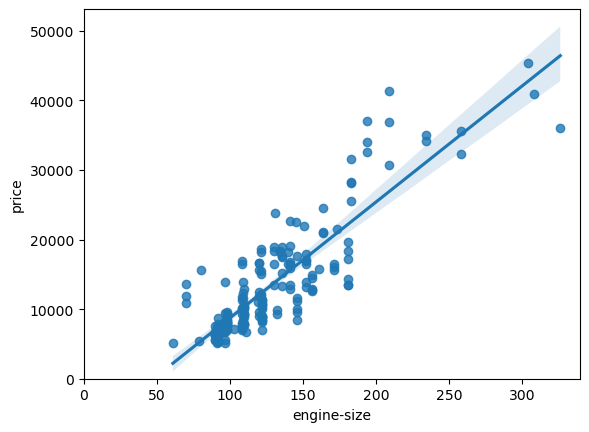

In [559]:
sns.regplot(x = "engine-size",y = "price", data = df_final )
plt.ylim(0,)
plt.xlim(0,)
#ylim, xlim tells the plot to start from 0,0 at y and x axis

In [561]:
df_final[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


can find a strong positive correlation between engine size and price

<Axes: xlabel='highway-mpg', ylabel='price'>

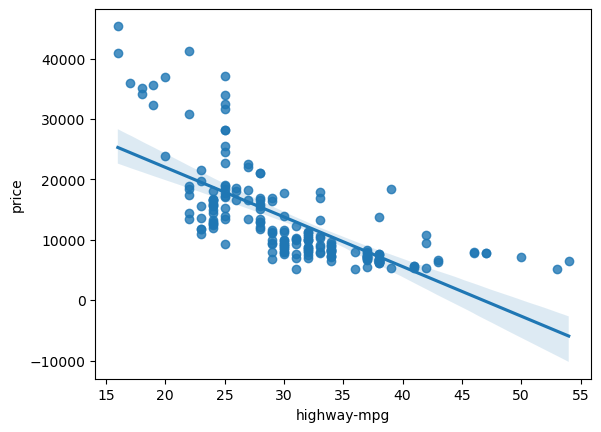

In [564]:
sns.regplot(x="highway-mpg", y="price", data=df_final)

In [566]:
df_final[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


can observe strong negative correlation between highway_mpg and price

<Axes: xlabel='peak-rpm', ylabel='price'>

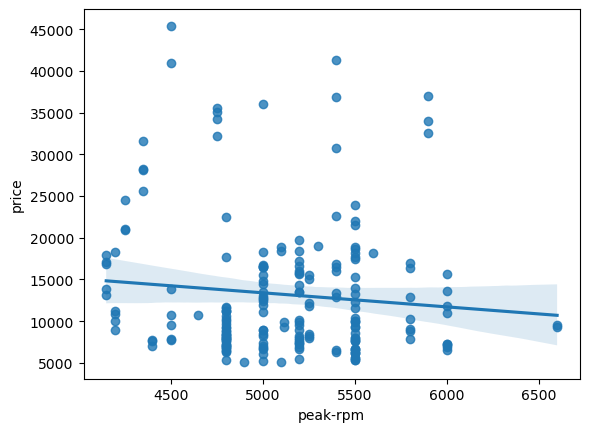

In [569]:
sns.regplot(x="peak-rpm", y="price", data=df_final)

In [571]:
df_final[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101542
price,-0.101542,1.000000


can find a weak negative correlation between peak rpm and price

<Axes: xlabel='stroke', ylabel='price'>

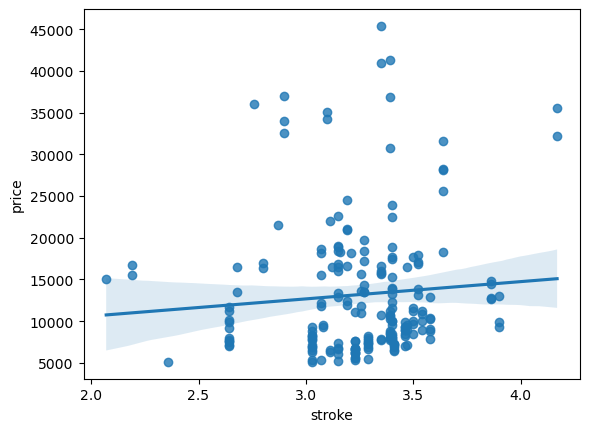

In [574]:
sns.regplot(x="stroke", y="price", data=df_final)

In [576]:
df_final[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.082267
price,0.082267,1.000000


We can see very weak positive correlation between stroke and price

## Categorical Variables

### Box plot for different variables to see goodness of prediction ability for variable having less varieties in them

These are variables that describe a 'characteristic' of a data element. The categorical variables can have the type object or int. A good way to visualize categorical variables is by using boxplot

In [582]:
df_categorical_variables = df.select_dtypes(include=["object","category"])

In [584]:
df_categorical_variables.columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system', 'horsepower_bins'],
      dtype='object')

In [586]:
df_categorical_variables.nunique()

make                22
fuel-type            2
aspiration           2
num-of-doors         2
body-style           5
drive-wheels         3
engine-location      2
engine-type          6
num-of-cylinders     7
fuel-system          8
horsepower_bins      3
dtype: int64

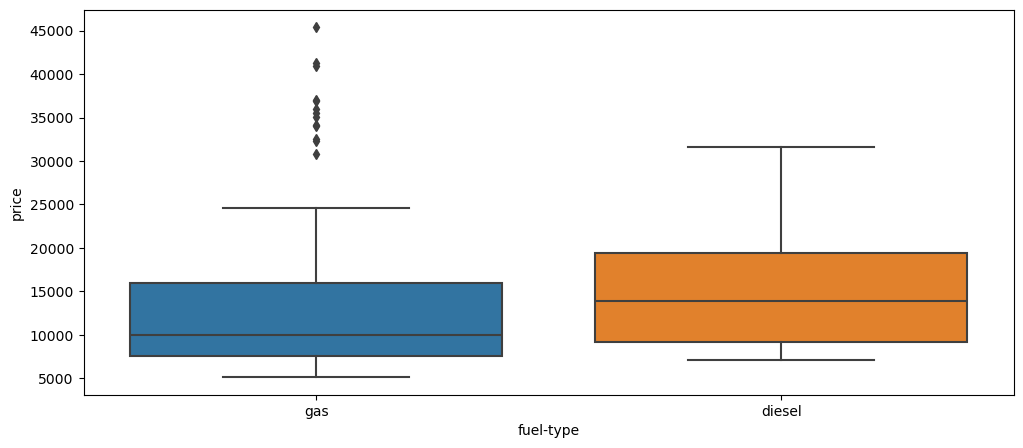

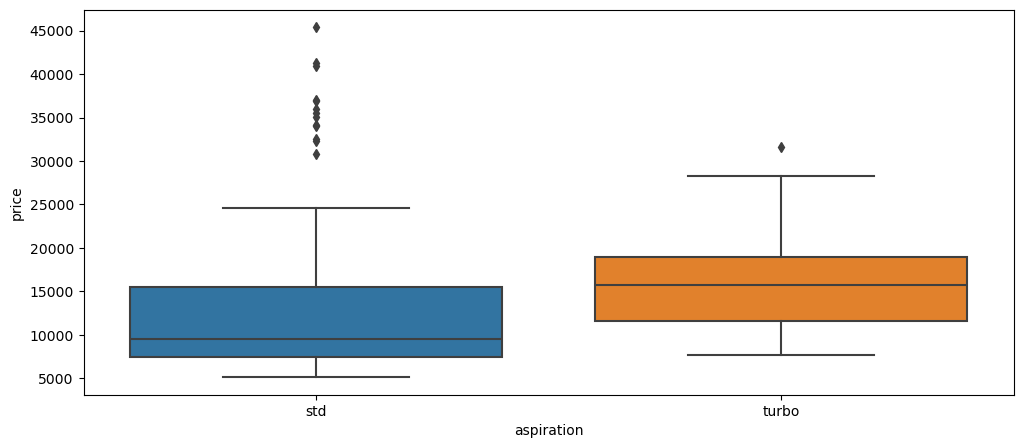

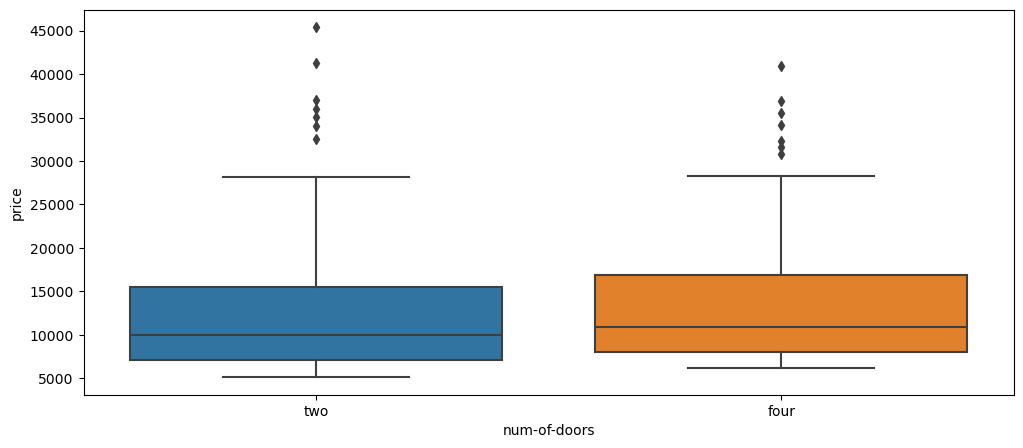

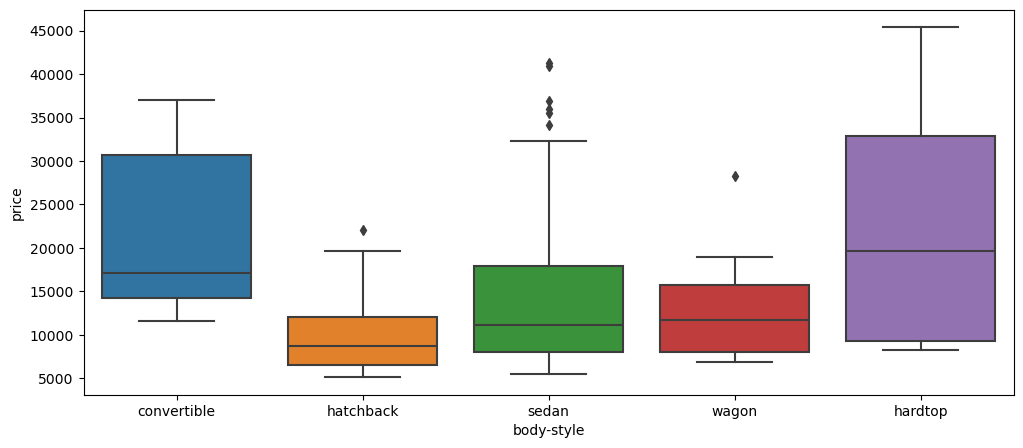

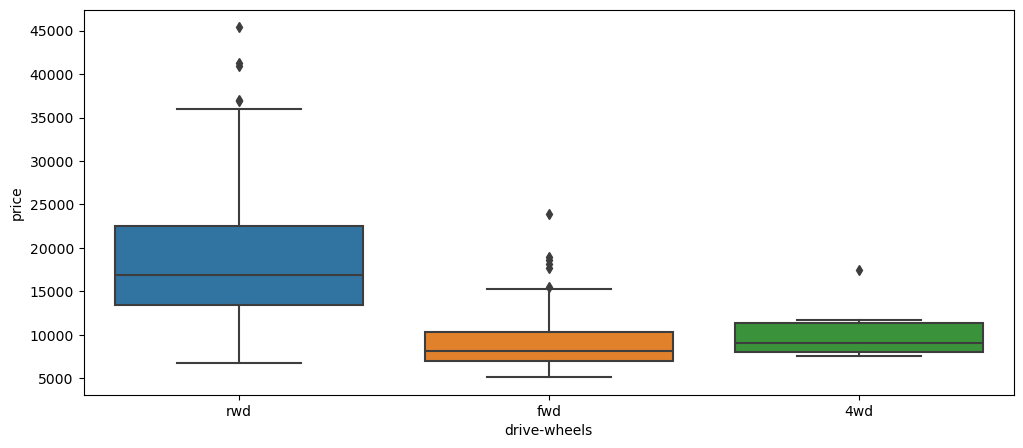

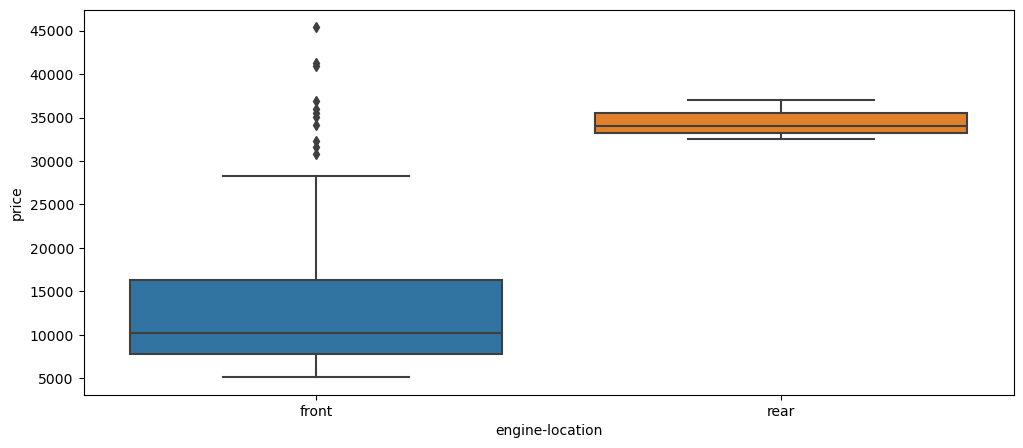

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


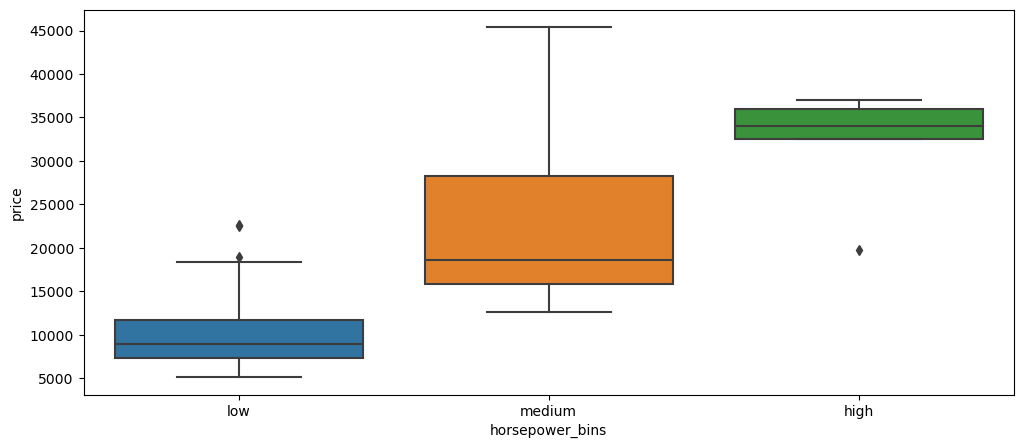

In [588]:
for i in df_categorical_variables.columns:
    if df_categorical_variables[i].nunique() < 6:
        plt.figure(figsize=(12,5))
        sns.boxplot(x = i, y = "price", data =df)
        plt.show()

With the above graphs we can see how different categorical variables have and impact on price

### For categorical variable with more different number of values in them

/var/folders/p6/k6khhfmx2x35mly7crf32_5m0000gn/T/ipykernel_67647/187780617.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=i, y="price", data=df, ci=None)


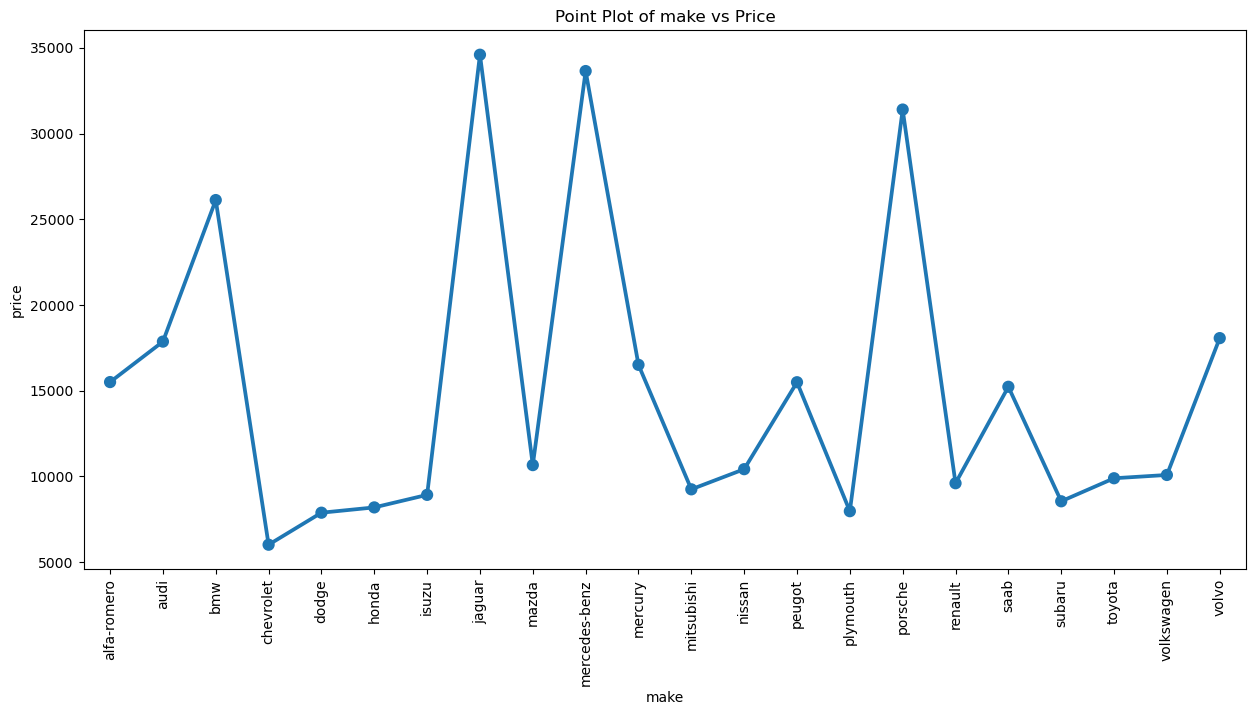

/var/folders/p6/k6khhfmx2x35mly7crf32_5m0000gn/T/ipykernel_67647/187780617.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=i, y="price", data=df, ci=None)


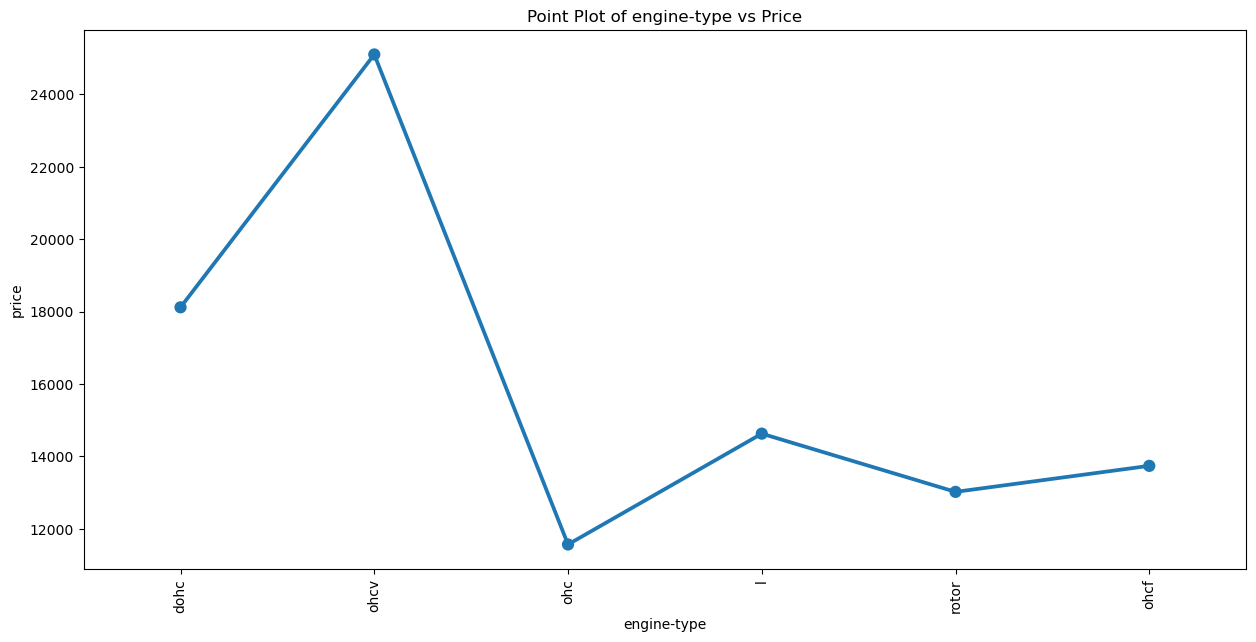

/var/folders/p6/k6khhfmx2x35mly7crf32_5m0000gn/T/ipykernel_67647/187780617.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=i, y="price", data=df, ci=None)


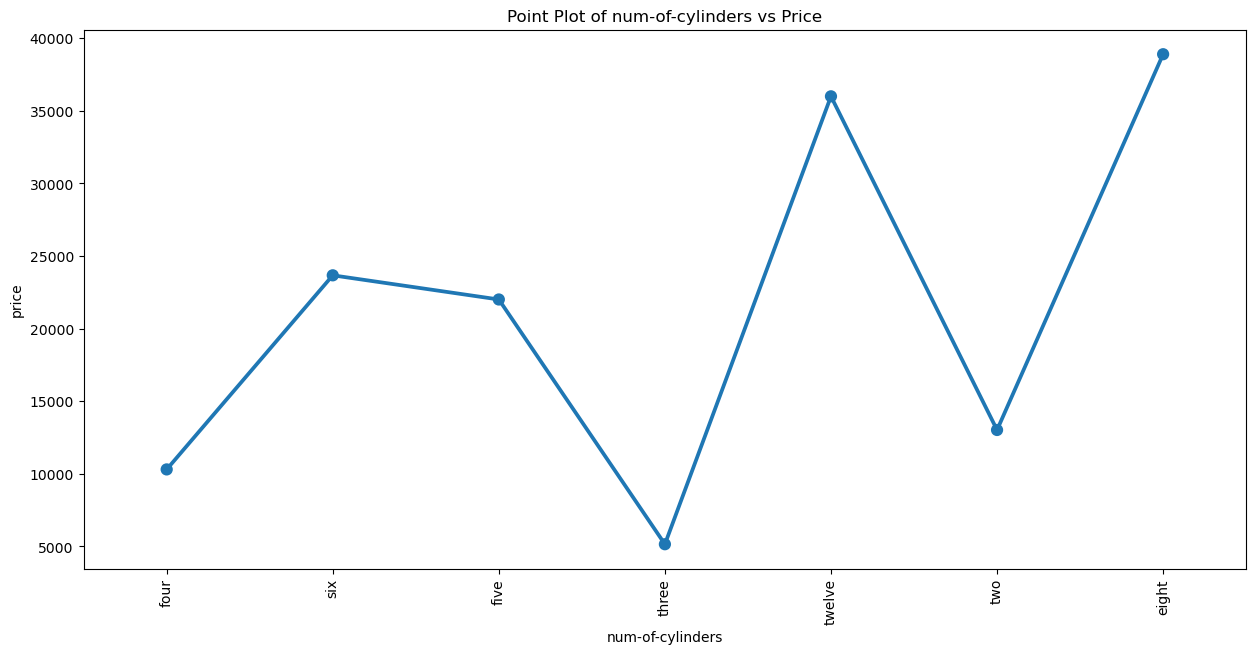

/var/folders/p6/k6khhfmx2x35mly7crf32_5m0000gn/T/ipykernel_67647/187780617.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=i, y="price", data=df, ci=None)


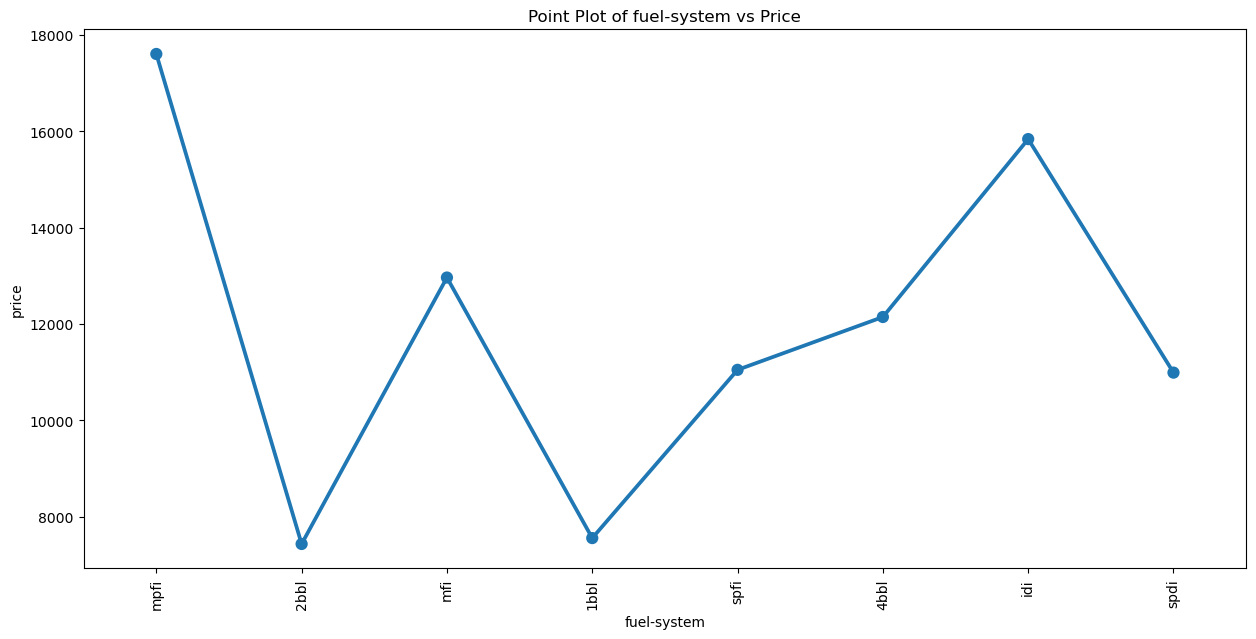

In [591]:
for i in df_categorical_variables.columns:
    if df_categorical_variables[i].nunique() >= 6:
        plt.figure(figsize=(15, 7))
        sns.pointplot(x=i, y="price", data=df, ci=None)
        plt.xticks(rotation=90)
        plt.title(f'Point Plot of {i} vs Price')
        plt.show()

## Using GroupBy

In [595]:
df_engloc_pri = df[["engine-location","price"]]
df_engloc_pri.groupby(["engine-location"]).mean()

,price
engine-location,
front,12884.085859
rear,34528.000000


In [597]:
df_engloc_bost_pri = df[["engine-location","body-style","price"]]
first_group = df_engloc_bost_pri.groupby(["engine-location","body-style"], as_index = False).mean()

In [599]:
first_group

,engine-location,body-style,price
0,front,convertible,18863.000000
1,front,hardtop,18518.666667
2,front,hatchback,9957.441176
3,front,sedan,14459.755319
4,front,wagon,12371.960000
5,rear,convertible,37028.000000
6,rear,hardtop,33278.000000


In [601]:
grouped_pivot = first_group.pivot(index = "engine-location",columns = "body-style")
grouped_pivot

price                                                   
body-style      convertible       hardtop    hatchback         sedan     wagon
engine-location                                                               
front               18863.0  18518.666667  9957.441176  14459.755319  12371.96
rear                37028.0  33278.000000          NaN           NaN       NaN

In [603]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                                   
body-style      convertible       hardtop    hatchback         sedan     wagon
engine-location                                                               
front               18863.0  18518.666667  9957.441176  14459.755319  12371.96
rear                37028.0  33278.000000     0.000000      0.000000      0.00

Text(0.5, 1.0, 'heatmap of bodystyle, engine location, price')

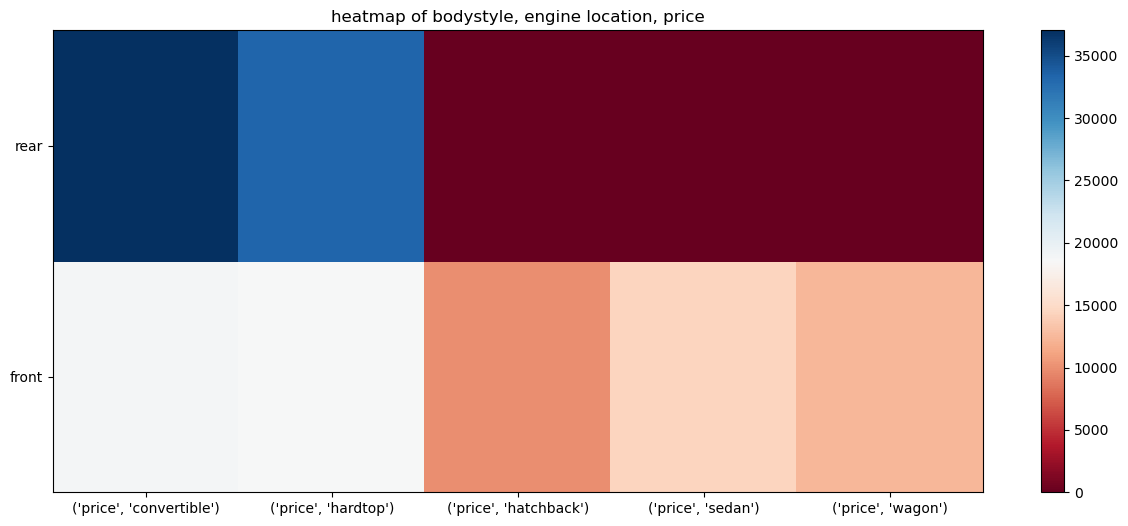

In [605]:
plt.figure(figsize=(15,6))
plt.pcolor(grouped_pivot,cmap ='RdBu')
plt.colorbar()
plt.yticks(ticks=np.arange(0.5, len(grouped_pivot.index), 1),labels = grouped_pivot.index)
plt.xticks(ticks=np.arange(0.5, len(grouped_pivot.columns), 1),labels = grouped_pivot.columns)
plt.title('heatmap of bodystyle, engine location, price')

## Pearson Coefficient

### To better understand correlation of different numerical variables with price

In [609]:
columns_for_pearson=df.select_dtypes(include = ["int64","float64"]).columns

In [611]:
columns_for_pearson

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [613]:
for i in columns_for_pearson:
    pearson_coef, p_value = stats.pearsonr(df[i], df['price'])
    print("The Pearson Correlation Coefficient for",i," with price is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient for symboling  with price is -0.08239118716962357  with a P-value of P = 0.24491487657164715
The Pearson Correlation Coefficient for normalized-losses  with price is 0.13399873429274337  with a P-value of P = 0.05789749352703129
The Pearson Correlation Coefficient for wheel-base  with price is 0.584641822265508  with a P-value of P = 8.076488270732885e-20
The Pearson Correlation Coefficient for length  with price is 0.6906283804483639  with a P-value of P = 8.01647746615924e-30
The Pearson Correlation Coefficient for width  with price is 0.7512653440522673  with a P-value of P = 9.20033551048206e-38
The Pearson Correlation Coefficient for height  with price is 0.13548630756805974  with a P-value of P = 0.05514627325101255
The Pearson Correlation Coefficient for curb-weight  with price is 0.8344145257702843  with a P-value of P = 2.189577238893965e-53
The Pearson Correlation Coefficient for engine-size  with price is 0.8723351674455185  with a P-value

# Conclusion After Eda

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables: wheel-base,length, width, curb-weight, engine-size, horsepower, city-mpg, highway-mpg 

Categorical variables: Drive-wheels, engine-location, engine-type

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

# Model Development and Evaluation

## Simple Linear Regression

### Highway_MPG & Price

In [620]:
lm = LinearRegression()

In [622]:
X_highway_mpg = df[["highway-mpg"]]
Y_price = df["price"]

LinearRegression model from scikit-learn expects X to be a 2-dimensional array (even if it only has one feature), while Y can be a 1-dimensional array. When you pass X_series (1D array), scikit-learn raises a ValueError because it expects X to be a 2D array with shape (n_samples, n_features). By passing X_dataframe (2D array), you are meeting the requirement of having a shape of (n_samples, n_features).


1D Array (Series): df["highway-mpg"] -> Not suitable for LinearRegression X.

2D Array (DataFrame): df[["highway-mpg"]] -> Suitable for LinearRegression X.

In [625]:
lm.fit(X_highway_mpg,Y_price)

LinearRegression()

The fit method computes the optimal values for the intercept (bias) and coefficients (weights) that minimize the sum of squared residuals

In [628]:
print(f"Intercept: {lm.intercept_}")

Intercept: 38423.3058581574


In [630]:
print(f"Intercept: {lm.coef_}")

Intercept: [-821.73337832]


In [632]:
Y_predicted_for_highway_mpg=lm.predict(X_highway_mpg)


In [634]:
Y_predicted_for_highway_mpg[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

### Engine-Size & Price

In [637]:
lm1 = LinearRegression()

In [639]:
X_engine_size = df[["engine-size"]]
Y_price = df["price"]

In [641]:
lm1.fit(X_engine_size,Y_price)

LinearRegression()

In [643]:
print(f"Intercept: {lm1.intercept_}")

Intercept: -7963.338906281042


In [645]:
print(f"Intercept: {lm1.coef_}")

Intercept: [166.86001569]


In [647]:
Y_predicted_for_engine_size = lm1.predict(X_engine_size)

In [649]:
Y_predicted_for_engine_size[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

## Multiple Linear Regression

### Horsepower, curb-weight, engine-size, highway-mpg & price

In [653]:
lm2 = LinearRegression()

In [655]:
Set_1 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [657]:
lm2.fit(Set_1, Y_price)

LinearRegression()

In [659]:
print(f"Intercept is: {lm2.intercept_}")

Intercept is: -15824.038208234462


In [661]:
print(f"Intercept is: {lm2.coef_}")

Intercept is: [53.61042729  4.70886444 81.47225667 36.39637823]


In [663]:
Y_predicted_set_1 = lm2.predict(Set_1)

In [665]:
Y_predicted_set_1[0:5]

array([13699.00138847, 13699.00138847, 19055.18075089, 10621.20889105,
       15519.94133137])

### Normalized Losses, Highway MPG & Price

In [668]:
lm4 = LinearRegression()

In [670]:
Set_2 = df[["normalized-losses","highway-mpg"]]

In [672]:
lm4.fit(Set_2, Y_price)

LinearRegression()

In [674]:
print(f"Intercept is : {lm4.intercept_}")

Intercept is : 38201.31327245728


In [676]:
print(f"Intercept is : {lm4.coef_}")

Intercept is : [   1.49789586 -820.45434016]


In [678]:
Y_predicted_set_2 = lm4.predict(Set_2)

In [680]:
Y_predicted_set_2[0:5]

array([16231.78938339, 16231.78938339, 17052.24372355, 13833.33798916,
       20396.97271047])

## Model Evaluation Using Visualization

#### Regression plot and correlation

<Axes: xlabel='highway-mpg', ylabel='price'>

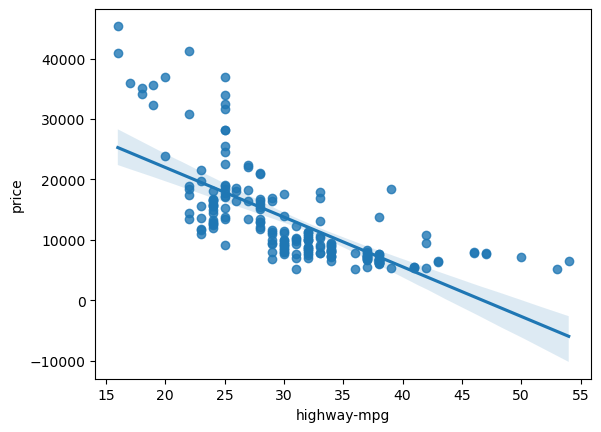

In [684]:
sns.regplot(x="highway-mpg", y="price", data=df)

<Axes: xlabel='peak-rpm', ylabel='price'>

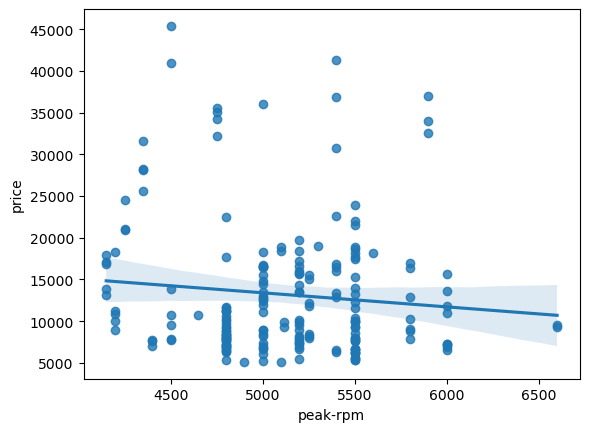

In [685]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [687]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058605,-0.101542
highway-mpg,-0.058605,1.000000,-0.704692
price,-0.101542,-0.704692,1.000000


#### Residual Plot 

A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

<Axes: xlabel='highway-mpg', ylabel='price'>

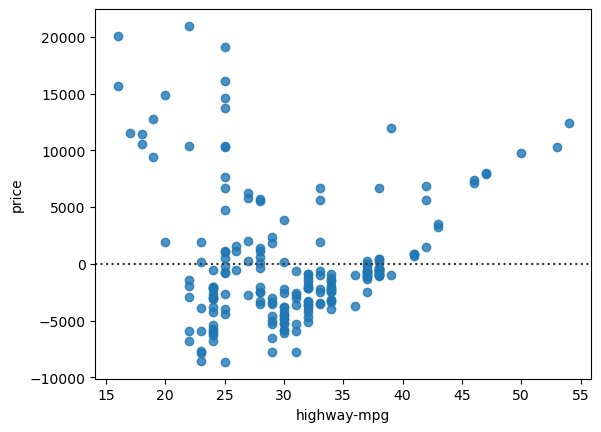

In [692]:
sns.residplot(x=df['highway-mpg'], y=df['price'])

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

#### Distribution Plot

How do you visualize the model for Multiple Linear Regression? We cant visualize it with regression plot or residual plot

/var/folders/p6/k6khhfmx2x35mly7crf32_5m0000gn/T/ipykernel_67647/302961877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  actual_plot_for_set_1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/p6/k6khhfmx2x35mly7crf32_5m0000gn/T/ipykernel_67647/302961877.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn 

<Axes: xlabel='price', ylabel='Density'>

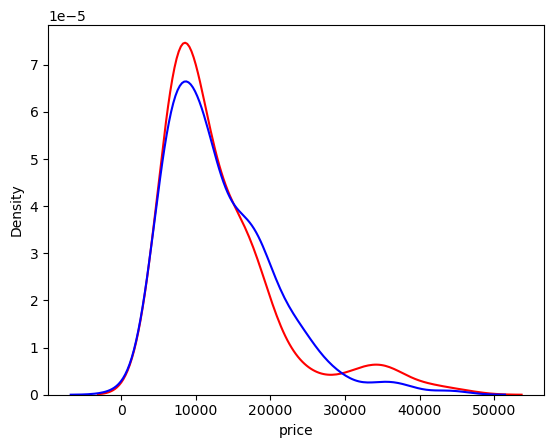

In [697]:
actual_plot_for_set_1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_predicted_set_1, hist=False, color="b", label="Fitted Values", ax = actual_plot_for_set_1 )

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit

#### Polynomial Regression 

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.


In [702]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    plt.plot(independent_variable, dependent_variable, ".", x_new, y_new, "*")
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    plt.show()
    plt.close()

In [704]:
X = df["highway-mpg"]
Y = df["price"]

##### 3 Order Polynomial Model for Highway-MPG and Prices

In [707]:
f = np.polyfit(X, Y, 3)
#polynomial order of 3
p = np.poly1d(f)
#generate polynomial function to predict y
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


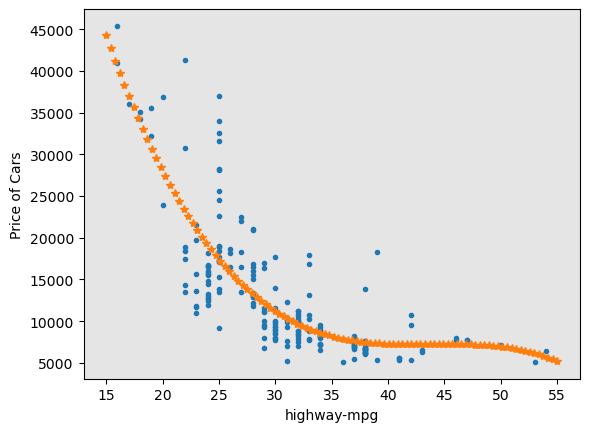

In [709]:
PlotPolly(p, X, Y, "highway-mpg")

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

##### 11 Order Polynomial Model for Highway-MPG and Prices

In [713]:
f1 = np.polyfit(X, Y, 11)
#polynomial order of 11
p1 = np.poly1d(f1)
#generate polynomial function to predict y
print(p1)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


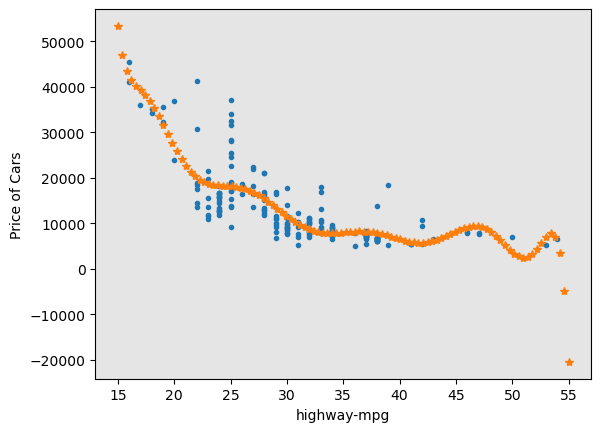

In [715]:
PlotPolly(p1, X, Y, "highway-mpg")

#### Multivariate Polynomial function

Polynomial Features in Detail

When you transform a dataset using PolynomialFeatures with degree 2, it includes:

All the original features.
All the combinations of the features up to the specified degree (2 in this case).
This includes squares of the original features and the interaction terms between different features.
Example Calculation

Let's denote the original features as x1,x2,x3,x4

then we get: 
x1,x2,x3,x4
x1x2,x1x3,x1x4,x2x3,x2x4,x3x4
x1^2,x2^2,x3^2,x4^2
A constant term, usually 1, included by default.

In [718]:
# PolynomialFeatures object of degree 2
pr = PolynomialFeatures(degree = 2)
Set_1_pr = pr.fit_transform(Set_1)

In [720]:
Set_1_pr

array([[1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.5400e+02, 2.8230e+03, ..., 2.3104e+04, 3.9520e+03,
        6.7600e+02],
       ...,
       [1.0000e+00, 1.3400e+02, 3.0120e+03, ..., 2.9929e+04, 3.9790e+03,
        5.2900e+02],
       [1.0000e+00, 1.0600e+02, 3.2170e+03, ..., 2.1025e+04, 3.9150e+03,
        7.2900e+02],
       [1.0000e+00, 1.1400e+02, 3.0620e+03, ..., 1.9881e+04, 3.5250e+03,
        6.2500e+02]])

In [725]:
Set_1.shape

(201, 4)

In [733]:
Set_1.head()

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22


In [727]:
Set_1_pr.shape

(201, 15)

#### Pipelines

##### pipeline 1

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [768]:
Input1=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [770]:
pipe1=Pipeline(Input1)
pipe1

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [772]:
pipe1.fit(Set_1,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [774]:
Ypipe1=pipe1.predict(Set_1)

In [776]:
Ypipe1[0:4]

array([13103.37745014, 13103.37745014, 18228.50045451, 10392.95563313])

##### pipeline 2

In [780]:
Input2=[('scale',StandardScaler()), ('model',LinearRegression())]

In [782]:
pipe2=Pipeline(Input2)
pipe2

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [784]:
pipe2.fit(Set_1,Y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [786]:
Ypipe2=pipe2.predict(Set_1)

In [788]:
Ypipe2[0:4]

array([13699.00138847, 13699.00138847, 19055.18075089, 10621.20889105])

## Measures for In-Sample Evaluation

Quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

1) R^2 / R-squared
2) Mean Squared Error (MSE)

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.
The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.(Should be closer to 1)

The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value and the estimated value.

##### Simple Linear Regression

Highway-MPG & Prices

In [798]:
X = df[["highway-mpg"]]

In [842]:
lm.fit(X, Y)
print('The R-square for simple LM is: ', lm.score(X, Y))

The R-square for simple LM is:  0.4965911884339176


We can say that ~49.659% of the variation of the price is explained by this simple linear model "highway_mpg_fit".

In [845]:
Y_predicted = lm.predict(X)

In [847]:
Y_predicted[0:4]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

In [849]:
mse_lm = mean_squared_error(df['price'], Y_predicted)

In [851]:
mse_lm

31635042.944639888

##### Multiple Linear Regression

In [853]:
lm.fit(Set_1, Y)
print('The R-square for multiple LM is: ', lm.score(Set_1, Y))

The R-square for multiple LM is:  0.8094130135602673


We can say that ~80.94% of the variation of the price is explained by this Multiple linear model

In [856]:
Y_predicted_Set_1 = lm.predict(Set_1)

In [858]:
mse_set_1 = mean_squared_error(df['price'], Y_predicted_Set_1)

In [860]:
mse_set_1

11976801.681229586

##### Polynomial Fit

In [881]:
r_squared = r2_score(Y, p1(X))
print('The R-square value is: ', r_squared)
#p, p1 are polynomial fits of degree 3, 11 we already defined while plotting polynomial functions

The R-square value is:  0.7023769089350146


In [883]:
mean_squared_error(df['price'], p1(X))

18703127.65854583

# Conclusion After Model Development and Evaluation

1) Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.49659118843391759
MSE: 3.16 x10^7

2) Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

R-squared: 0.80896354913783497
MSE: 1.2 x10^7

3) Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.6741946663906514
MSE: 2.05 x 10^7

Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.